### 1) The given MNIST dataset contains images of hand written numbers from 0 to 9. Train a neural network in tensorflow. You have been provided with some starter code . Feel free to make epoch loss visualizations, or other type of visualization for this question and the next. 

In [1]:
#Feel free to add any other module needed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

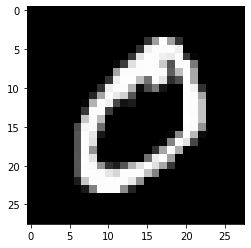

In [6]:
### Visualize samples of  images using matplotlib ###
num = 1
img = train_images[num].reshape(28,28)
plt.imshow(img, cmap="gray")

In [8]:
#Normalize Images. Normalize the images from 0 to 255 tp
#[-0.5 , 0.5] to make out network easier to train
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5

In [10]:
#Flatten the images. Flatten each 28x28 image into a 28^2 = 784 dimensional vector
#to pass in to the neural network
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))

In [11]:
print(train_images.shape) #60000 rows and 784 cols
print(test_images.shape) #10000 rows and 784 cols

(60000, 784)
(10000, 784)


In [12]:
#build the model
# 3 layers, 2 layers with 64 neurons and relu function
# 1 layer with 10 neurons and softmax function
model = Sequential()
model.add(Dense(64, activation = 'relu',input_dim=784))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
#Compile the model
#The loss function measures how well the model did on training, and the tries to improve on it using the optimizer
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy', #Classes that are greater than 2
    metrics = ['accuracy']
)

In [14]:
model.fit(
    train_images,
        to_categorical(train_labels), #Ex. 2 it expects [0,0,1,0,0,0,0,0,0]
        epochs = 5, #number of iterations over the entire dataset to train on
        batch_size = 32 #number of samples per gradient update for training    
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 14s 229us/step - loss: 0.3718 - acc: 0.8890
Epoch 2/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.1880 - acc: 0.9433
Epoch 3/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.1426 - acc: 0.9565
Epoch 4/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.1205 - acc: 0.9634
Epoch 5/5
60000/60000 [==============================] - 10s 173us/step - loss: 0.1060 - acc: 0.9659


In [15]:
#Evaluate Model
model.evaluate(
    test_images,
        to_categorical(test_labels)
)

10000/10000 [==============================] - 1s 89us/step


[0.11080221845591441, 0.9656]

In [ ]:
#save the model
#model.save_weights('model.h5')

In [19]:
#predict on the first 5 images
predictions = model.predict(test_images[:5])
#print our model predictions
print(np.argmax(predictions,axis=1))
print(test_labels[:5])

[7 2 1 0 4]
[7 2 1 0 4]
